### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [1]:
# сделайте разделение изначального набора данных в этой ячейке

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

sns.set_style("white")
sns.set_theme(style="whitegrid")

pd.set_option('display.max_columns', 50)


ASSETS_DIR = "assets"
FS_ASSETS_DIR = 'assets_fs'
HYP_ASSETS_DIR = 'assets_hyp'

os.makedirs(ASSETS_DIR, exist_ok=True)
os.makedirs(FS_ASSETS_DIR, exist_ok=True)
os.makedirs(HYP_ASSETS_DIR, exist_ok=True)

SEED = 42

In [2]:
df = pd.read_csv('initial_data.csv')

X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (84089, 15)
Размер тестовой выборки: (21023, 15)


#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


#### 2.1 Загрузка данных

In [3]:
df = pd.read_csv('initial_data.csv')

In [4]:
df

,index,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,total_area,price
0,0,1999,4,55.647701,37.761356,2.64,460,14,True,9,10.3,46.599998,3,False,80.000000,13500000
1,1,1995,4,55.687134,37.863522,2.64,186,9,True,4,10.0,17.000000,1,False,45.000000,5720000
2,2,2015,4,55.697556,37.924061,2.74,320,17,True,5,8.0,19.000000,1,False,37.799999,6000000
3,3,1997,4,55.834301,37.352211,2.64,473,17,True,10,9.2,30.799999,2,False,55.000000,8750000
4,4,1974,4,55.815945,37.701008,2.64,143,9,True,7,7.0,33.000000,2,False,48.000000,8500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105107,105107,1984,4,55.761795,37.410034,2.64,474,17,True,13,10.0,33.000000,2,False,57.700001,19300000
105108,105108,2004,4,55.853230,37.646873,2.74,513,17,True,9,7.0,18.000000,1,False,38.000000,9200000
105109,105109,1969,4,55.626068,37.608238,2.50,282,9,True,3,6.7,29.000000,2,False,45.000000,11300000
105110,105110,2008,4,55.872646,37.634228,2.74,128,17,True,9,12.9,33.900002,2,False,64.000000,14800000


#### 2.2. Общий обзор датасета

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105112 entries, 0 to 105111
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              105112 non-null  int64  
 1   build_year         105112 non-null  int64  
 2   building_type_int  105112 non-null  int64  
 3   latitude           105112 non-null  float64
 4   longitude          105112 non-null  float64
 5   ceiling_height     105112 non-null  float64
 6   flats_count        105112 non-null  int64  
 7   floors_total       105112 non-null  int64  
 8   has_elevator       105112 non-null  bool   
 9   floor              105112 non-null  int64  
 10  kitchen_area       105112 non-null  float64
 11  living_area        105112 non-null  float64
 12  rooms              105112 non-null  int64  
 13  is_apartment       105112 non-null  bool   
 14  total_area         105112 non-null  float64
 15  price              105112 non-null  int64  
dtypes:

df['build_year'] = df['build_year'].astype('category')
df['has_elevator'] = df['has_elevator'].astype('category')
df['is_apartment'] = df['is_apartment'].astype('category')

In [6]:
df.nunique()

index                105112
build_year              115
building_type_int         6
latitude              14392
longitude             14034
ceiling_height           35
flats_count             589
floors_total             29
has_elevator              2
floor                    28
kitchen_area            542
living_area            1362
rooms                     5
is_apartment              2
total_area             1785
price                  4017
dtype: int64

In [7]:
df.describe()

,index,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,floor,kitchen_area,living_area,rooms,total_area,price
count,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,105112.000000,1.051120e+05
mean,52555.500000,1984.442090,3.516754,55.727969,37.603565,2.688617,223.832360,13.177135,6.957598,8.126170,27.548942,1.945839,51.720546,1.184065e+07
std,30343.365085,19.572874,1.412276,0.103246,0.149194,0.131056,134.100335,5.255650,4.865707,3.009933,14.464359,0.816547,16.309861,4.538241e+06
min,0.000000,1902.000000,0.000000,55.427238,37.190639,2.450000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,11.000000,1.500000e+03
25%,26277.750000,1969.000000,3.000000,55.648724,37.495232,2.640000,111.000000,9.000000,3.000000,6.000000,19.000000,1.000000,38.400002,8.500000e+06
50%,52555.500000,1980.000000,4.000000,55.717361,37.591217,2.640000,193.000000,12.000000,6.000000,8.460000,28.400000,2.000000,48.400002,1.090000e+07
75%,78833.250000,2002.000000,4.000000,55.813507,37.721893,2.740000,301.000000,17.000000,10.000000,10.000000,36.000000,3.000000,60.599998,1.400000e+07
max,105111.000000,2023.000000,6.000000,56.011032,37.946411,3.000000,640.000000,29.000000,29.000000,16.300000,74.000000,5.000000,120.300003,2.860000e+07


***Вывод:***  
- В датасете 15 столбцов и 105112 записей.
- Данные были предобработаны в проекте первого спринта, пропущенных значений нет.

#### 2.3 Анализ признаков для модели

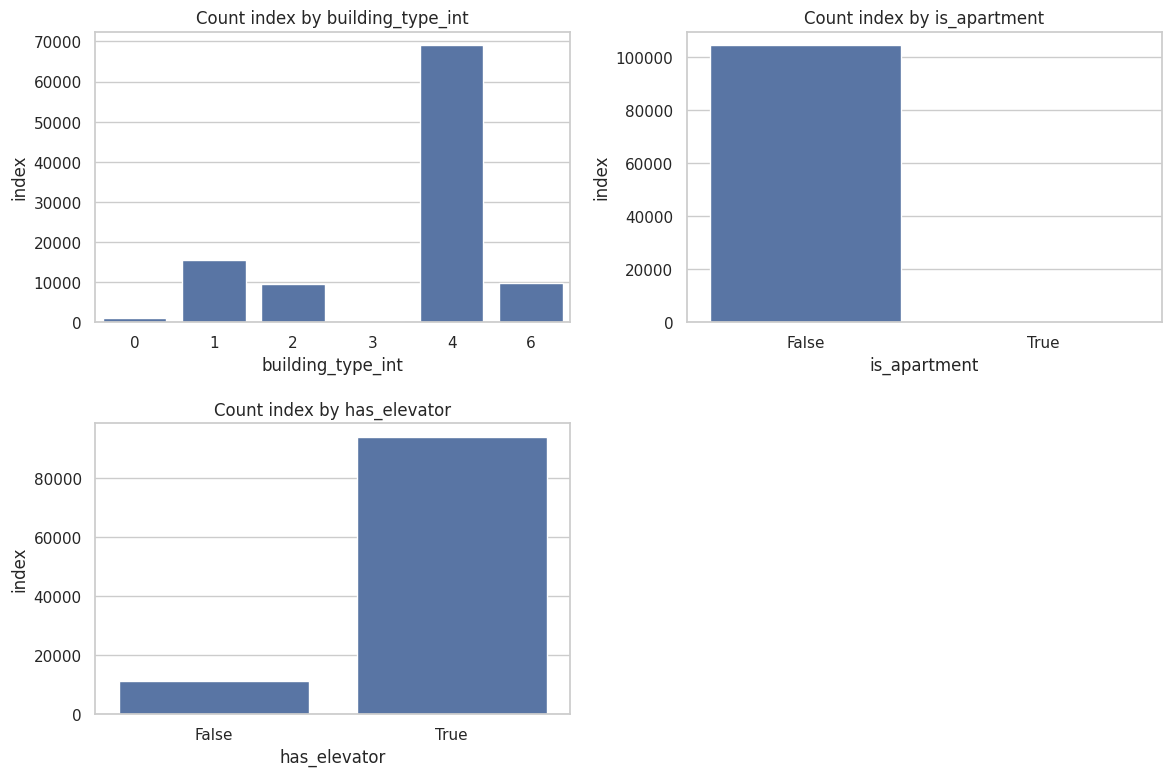

In [8]:
# Категориальные признаки

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 8.5)
fig.tight_layout(pad=4)

# График 1
x = "building_type_int"
y = "index"
agg_df = df.groupby(x)[y].nunique().reset_index()
sns.barplot(data=agg_df, x=x, y=y, ax=axs[0, 0])
axs[0, 0].set_title(f'Count {y} by {x}')

# График 2
x = "is_apartment"
agg_df = df.groupby(x)[y].nunique().reset_index()
sns.barplot(data=agg_df, x=x, y=y, ax=axs[0, 1])
axs[0, 1].set_title(f'Count {y} by {x}')

# График 3
x = "has_elevator"
agg_df = df.groupby(x)[y].nunique().reset_index()
sns.barplot(data=agg_df, x=x, y=y, ax=axs[1, 0])
axs[1, 0].set_title(f'Count {y} by {x}')

# Удаляем 4-й график
fig.delaxes(axs[1, 1])

# сохранение графиков в файл
plt.savefig(os.path.join(ASSETS_DIR, 'cat_features'))

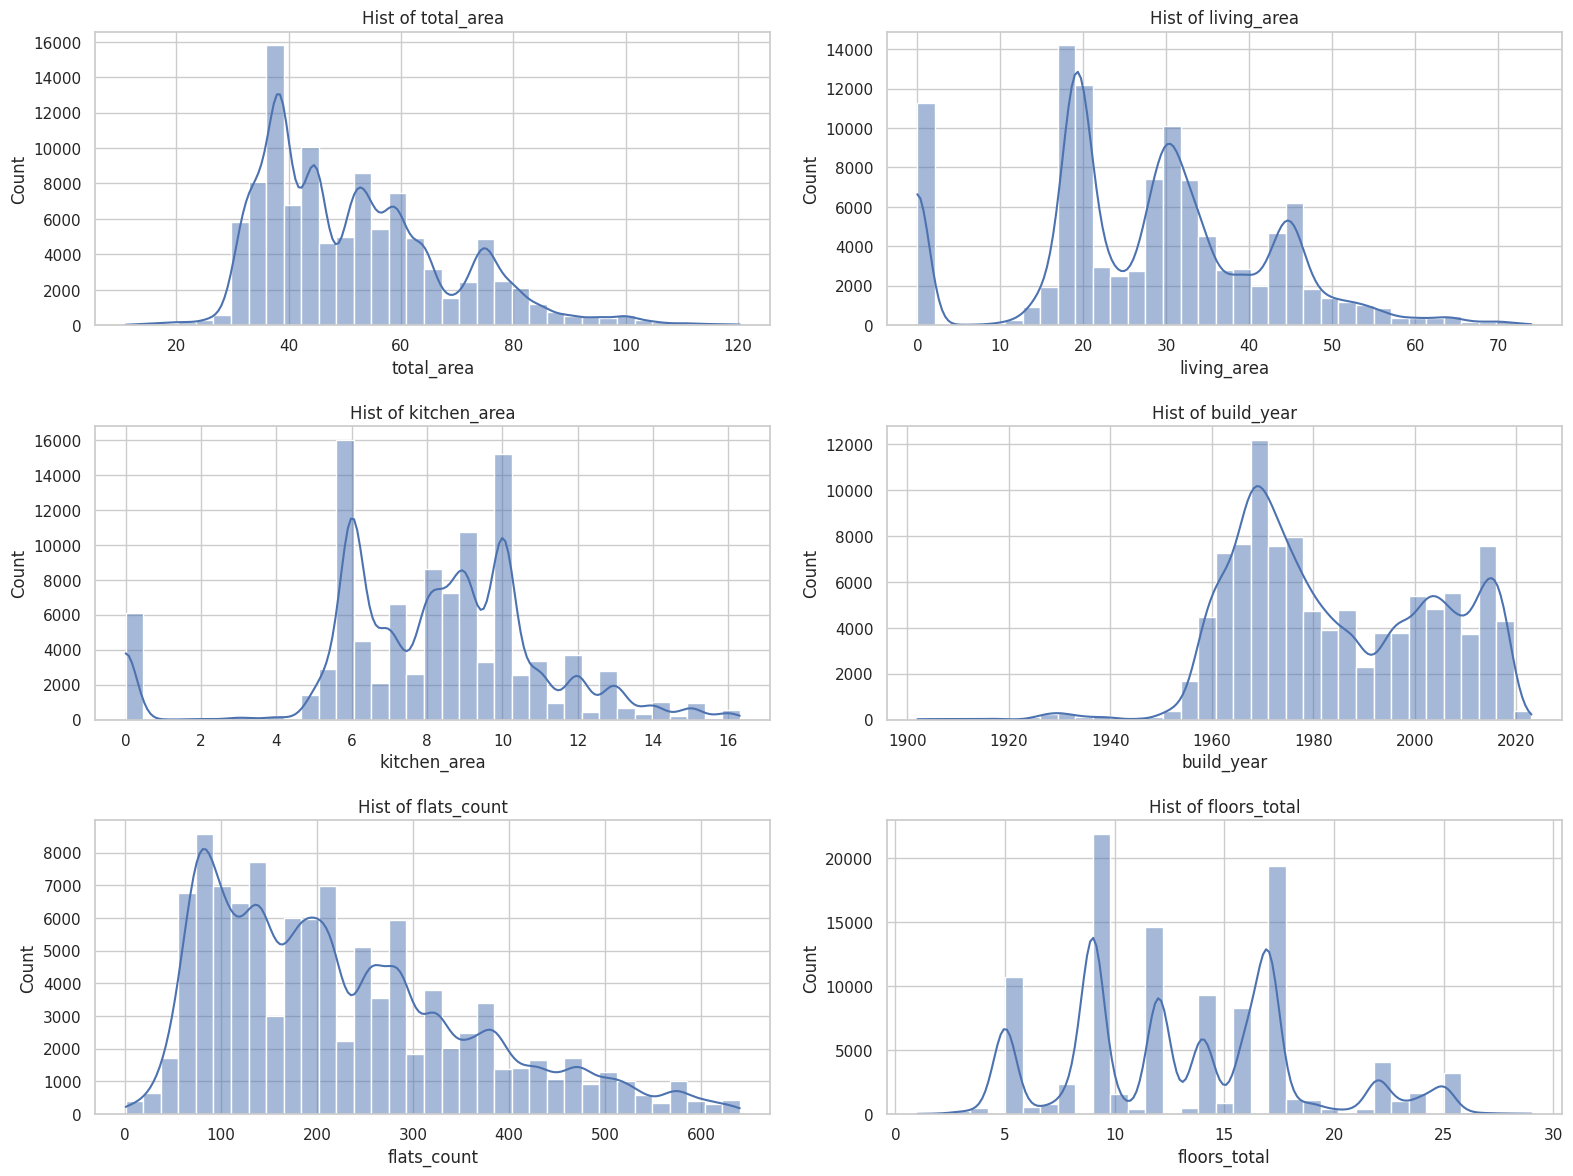

In [9]:
# Числовые признаки 1

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=4)

# График 1
x='total_area'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[0, 0])
axs[0, 0].set_title(f'Hist of {x}')

# График 2
x='living_area'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[0, 1])
axs[0, 1].set_title(f'Hist of {x}')

# График 3
x='kitchen_area'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[1, 0])
axs[1, 0].set_title(f'Hist of {x}')

# График 4
x='build_year'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[1, 1])
axs[1, 1].set_title(f'Hist of {x}')

# График 5
x='flats_count'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[2, 0])
axs[2, 0].set_title(f'Hist of {x}')

# График 6
x='floors_total'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[2, 1])
axs[2, 1].set_title(f'Hist of {x}')

# сохранение графиков в файл
plt.savefig(os.path.join(ASSETS_DIR, 'num_features'))

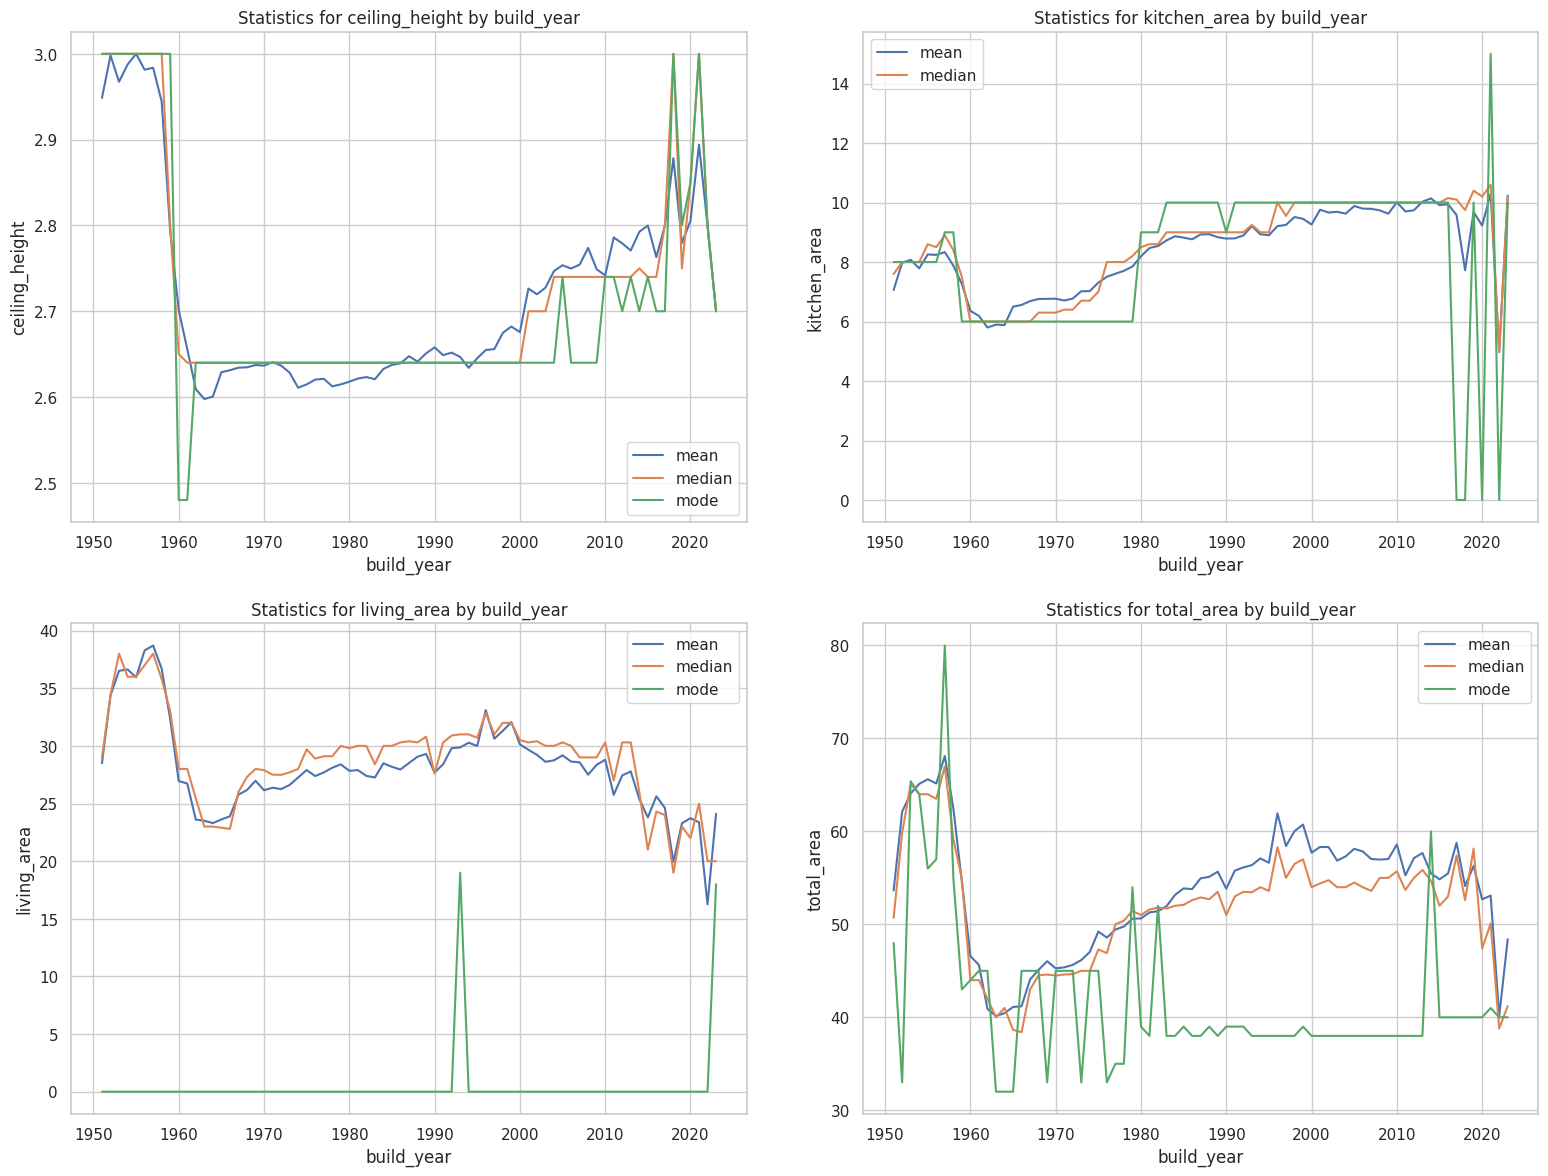

In [10]:
#  Числовые признаки по годам

x = "build_year"

num_columns = ['ceiling_height', 
               'kitchen_area', 
               'living_area', 
               'total_area']

stats = ["mean", "median", lambda x: x.mode().iloc[0]]

ceiling_height_agg = df[[x] + [num_columns[0]]].groupby([x]).agg(stats).reset_index()
ceiling_height_agg.columns = ceiling_height_agg.columns.droplevel()
ceiling_height_agg.columns = [x, "ceiling_height_mean", "ceiling_height_median", "ceiling_height_mode"]


kitchen_area_agg = df[[x] + [num_columns[1]]].groupby([x]).agg(stats).reset_index()
kitchen_area_agg.columns = kitchen_area_agg.columns.droplevel()
kitchen_area_agg.columns = [x, "kitchen_area_mean", "kitchen_area_median", "kitchen_area_mode"]

living_area_agg = df[[x] + [num_columns[2]]].groupby([x]).agg(stats).reset_index()
living_area_agg.columns = living_area_agg.columns.droplevel()
living_area_agg.columns = [x, "living_area_mean", "living_area_median", "living_area_mode"]

total_area_agg = df[[x] + [num_columns[3]]].groupby([x]).agg(stats).reset_index()
total_area_agg.columns = total_area_agg.columns.droplevel()
total_area_agg.columns = [x, "total_area_mean", "total_area_median", "total_area_mode"]

ceiling_height_agg = ceiling_height_agg[ceiling_height_agg["build_year"] > 1950].sort_values("build_year")
kitchen_area_agg = kitchen_area_agg[kitchen_area_agg["build_year"] > 1950].sort_values("build_year")
living_area_agg = living_area_agg[living_area_agg["build_year"] > 1950].sort_values("build_year")
total_area_agg = total_area_agg[total_area_agg["build_year"] > 1950].sort_values("build_year")

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=4)

# Графики для ceiling_height
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_mean', label='mean')
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_median', label='median')
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_mode', label='mode')
axs[0,0].set_title(f"Statistics for {num_columns[0]} by {x}")
axs[0,0].set_ylabel('ceiling_height', fontsize=12)
axs[0,0].legend()

# Графики для kitchen_area
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_mean', label='mean')
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_median', label='median')
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_mode')
axs[0,1].set_title(f"Statistics for {num_columns[1]} by {x}")
axs[0,1].set_ylabel('kitchen_area', fontsize=12)
axs[0,1].legend()

# Графики для living_area
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_mean', label='mean')
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_median', label='median')
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_mode', label='mode')
axs[1,0].set_title(f"Statistics for {num_columns[2]} by {x}")
axs[1,0].set_ylabel('living_area', fontsize=12)
axs[1,0].legend()

# Графики для total_area
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_mean', label='mean')
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_median', label='median')
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_mode', label='mode')
axs[1,1].set_title(f"Statistics for {num_columns[3]} by {x}")
axs[1,1].set_ylabel('total_area', fontsize=12)
axs[1,1].legend()

# сохранение графиков в файл
plt.savefig(os.path.join(ASSETS_DIR, 'statistics_by_year'))

#### 2.4 Анализ целевой переменной

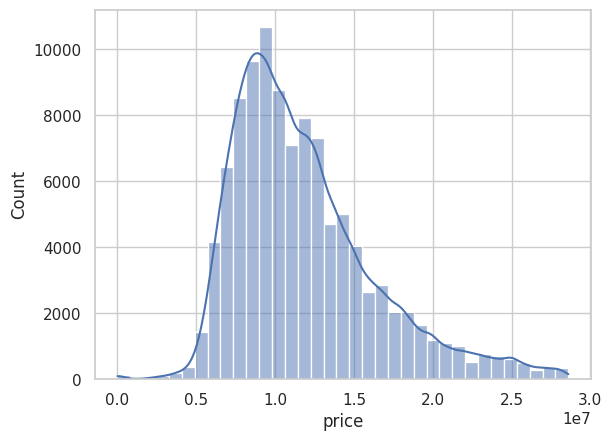

In [11]:
# График price

x='price'
sns.histplot(data=df, x=x, kde=True, bins=35)

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'target'))

In [12]:
df['price'].describe()

count    1.051120e+05
mean     1.184065e+07
std      4.538241e+06
min      1.500000e+03
25%      8.500000e+06
50%      1.090000e+07
75%      1.400000e+07
max      2.860000e+07
Name: price, dtype: float64

#### 2.4 Анализ целевой переменной в зависимости от различных признаков

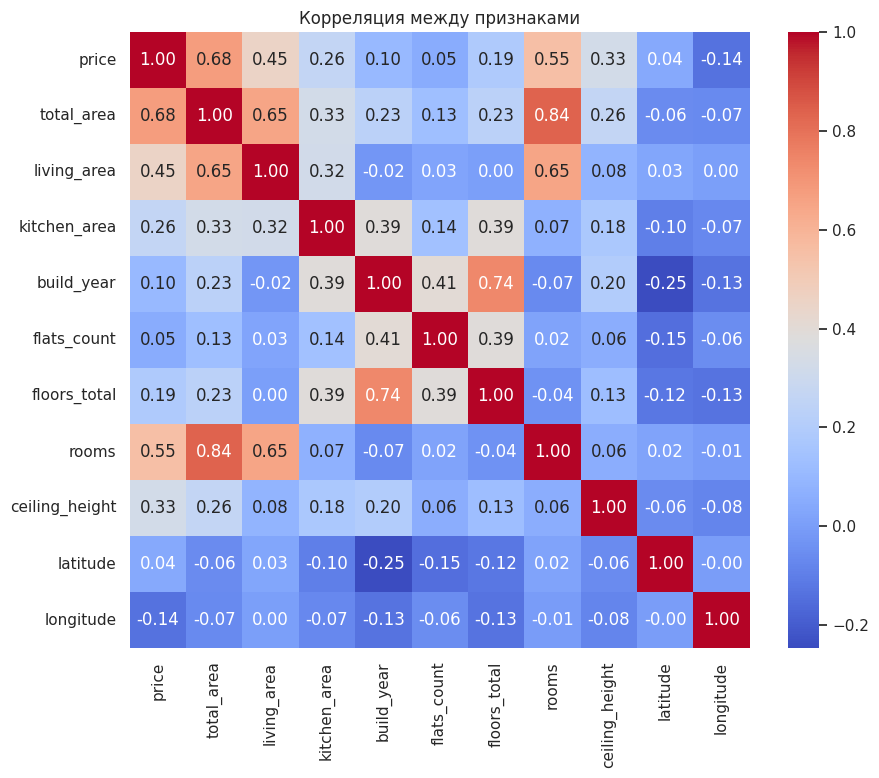

In [13]:
# Числовые признаки

num_cols = ['price','total_area','living_area','kitchen_area','build_year','flats_count','floors_total'
           ,'rooms','ceiling_height','latitude','longitude']

correlations_with_price = df[num_cols].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_price, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между признаками')

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'corr_with_target'))


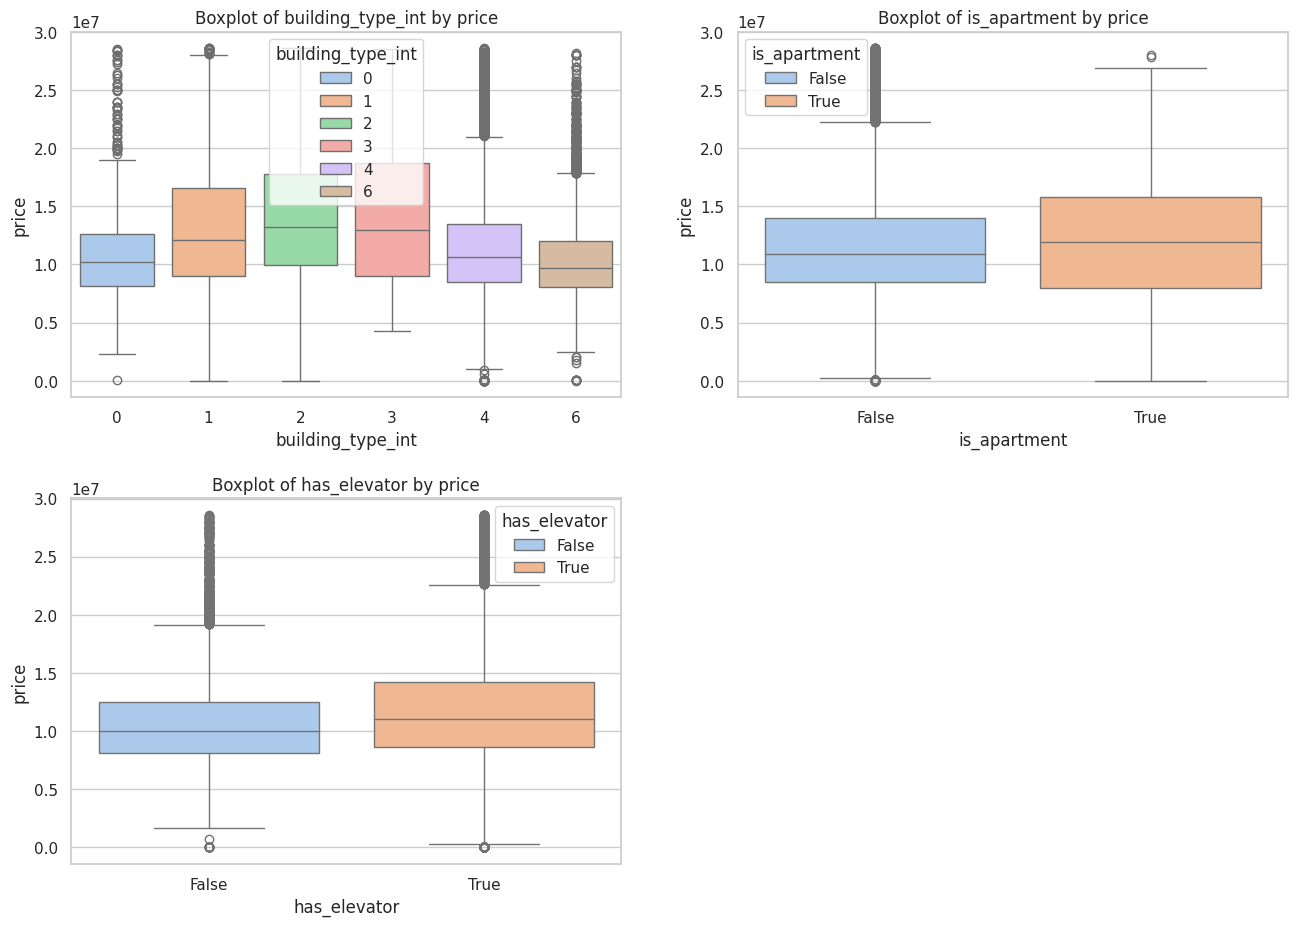

In [14]:
# Категориалные признаки

cat_and_bin_cols = ['is_apartment','has_elevator','building_type_int']

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 10, forward=True)
fig.tight_layout(pad=4)
y = 'price'


x = 'building_type_int'
sns.boxplot(data=df, x=x, y=y, ax=axs[0, 0], hue=x, palette='pastel')
axs[0, 0].set_title(f'Boxplot of {x} by {y}')

x = 'is_apartment'
sns.boxplot(data=df, x=x, y=y, ax=axs[0, 1], hue=x, palette='pastel')
axs[0, 1].set_title(f'Boxplot of {x} by {y}')

x = 'has_elevator'
sns.boxplot(data=df, x=x, y=y, ax=axs[1, 0], hue=x, palette='pastel')
axs[1, 0].set_title(f'Boxplot of {x} by {y}')

fig.delaxes(axs[1, 1])

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'boxplot_cat_features_price'))

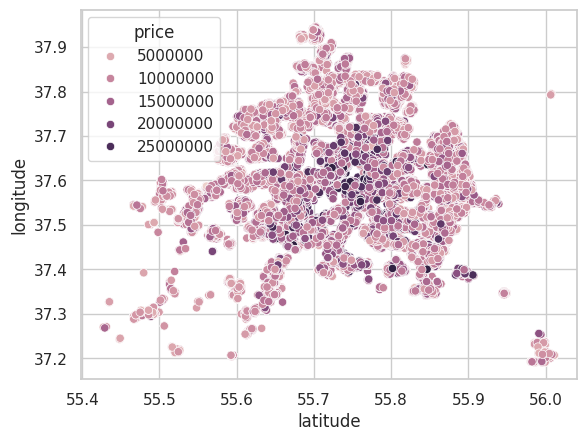

In [15]:
# График latitude, longitude от price
sns.scatterplot(data=df, x='latitude', y='longitude',hue='price')

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'geo_price'))

#### 2.5 Выводы после EDA

Данные были предобработаны в проекте первого спринта, проанализированы и  отчищены от выбросов. Пропущенных значений нет.  

***Вывод:***  
- По ряду категориальных и бинарных признаков виден дисбаланс например:`building_type_int`, `is_apartment`, `has_elevator`  
- Все числовые признаки несмотря на удаление выбросов имеют хвосты.  
- С годами растет высота потолков, но уменьшается площадь помещений.    
- Корреляционный анализ показывает что наиболее сильные признаки это признаки которые непосредственно касаются размеров площадей:  
    - `total_area` (0.68) — самая сильная связь. Чем больше общая площадь, тем выше цена (логично).
    - `rooms` (0.55) — количество комнат также сильно влияет на цену.  
    - `living_area` (0.45) — жилая площадь коррелирует с ценой, но слабее, чем общая площадь.  

    - `total_area` и `rooms` (0.84) — почти линейная зависимость. Это может означать, что количество комнат часто определяется общей площадью (риск мультиколлинеарности).
    - `build_year` и `floors_total` (0.74) — в новых домах обычно больше этажей.
    - `kitchen_area` слабо связана с `price` (0.26), но сильно с `build_year` (0.39) — возможно, в новых домах делают большие кухни.
    - `ceiling_height` (0.33) — высота потолков имеет умеренное влияни.  

    - Географические координаты (`latitude, longitude`) почти не влияют на цену (коэффициенты близки к 0). Возможно, данные недостаточно детализированы (например, нет привязки к районам).
    - `flats_count` (количество квартир в доме) и `floors_total` слабо связаны с ценой — цена зависит скорее от характеристик самой квартиры, чем от дома.  

- Геолокации объектов сгруппированы в одной области и судя по данным это Москва. На будущее: можно сформировать доп. признаки, такие как удаленность от центра и от метро.  
- ***Таргет наиболее "приближен" к нормальному распределению, но наблюдается правосторонняя асимметрия. На базовой модели был логорифмирован целевой признак и наблюдалось резкое улучшение метрик.***  


- Все графики для анализа сохранены в отельные файлы:  
    - `cat_features.png`  
    - `num_features.png`
    - `statistics_by_year.png`
    - `target.png`
    - `corr_with_target.png`
    - `boxplot_cat_features_price.png`
    - `geo_price.png`

#### 2.6 логирование артефактов в MLflow

In [16]:
markdown_content = '''Данные были предобработаны в проекте первого спринта, проанализированы и  отчищены от выбросов. Пропущенных значений нет.  

***Вывод:***  
- По ряду категориальных и бинарных признаков виден дисбаланс например:`building_type_int`, `is_apartment`, `has_elevator`  
- Все числовые признаки несмотря на удаление выбросов имеют хвосты.  
- С годами растет высота потолков, но уменьшается площадь помещений.    
- Корреляционный анализ показывает что наиболее сильные признаки это признаки которые непосредственно касаются размеров площадей:  
    - `total_area` (0.68) — самая сильная связь. Чем больше общая площадь, тем выше цена (логично).
    - `rooms` (0.55) — количество комнат также сильно влияет на цену.  
    - `living_area` (0.45) — жилая площадь коррелирует с ценой, но слабее, чем общая площадь.  

    - `total_area` и `rooms` (0.84) — почти линейная зависимость. Это может означать, что количество комнат часто определяется общей площадью (риск мультиколлинеарности).
    - `build_year` и `floors_total` (0.74) — в новых домах обычно больше этажей.
    - `kitchen_area` слабо связана с `price` (0.26), но сильно с `build_year` (0.39) — возможно, в новых домах делают большие кухни.
    - `ceiling_height` (0.33) — высота потолков имеет умеренное влияни.  

    - Географические координаты (`latitude, longitude`) почти не влияют на цену (коэффициенты близки к 0). Возможно, данные недостаточно детализированы (например, нет привязки к районам).
    - `flats_count` (количество квартир в доме) и `floors_total` слабо связаны с ценой — цена зависит скорее от характеристик самой квартиры, чем от дома.  

- Геолокации объектов сгруппированы в одной области и судя по данным это Москва. На будущее: можно сформировать доп. признаки, такие как удаленность от центра и от метро.  
- ***Таргет наиболее "приближен" к нормальному распределению, но наблюдается правосторонняя асимметрия. На базовой модели был логорифмирован целевой признак и наблюдалось резкое улучшение метрик.***  


- Все графики для анализа сохранены в отельные файлы:  
    - `cat_features.png`  
    - `num_features.png`
    - `statistics_by_year.png`
    - `target.png`
    - `corr_with_target.png`
    - `boxplot_cat_features_price.png`
    - `geo_price.png`
'''

markdown_file = f"{ASSETS_DIR}/conclusions_eda.md"
with open(markdown_file, "w") as f:
    f.write(markdown_content)

In [17]:
import os
import joblib
import mlflow
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "ozerge_PROJECT_SPRINT_2"
RUN_NAME = "EDA"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    notebook_path = "../model_improvement/project_template_sprint_2.ipynb"
    mlflow.log_artifact(notebook_path)

    mlflow.log_artifacts(ASSETS_DIR)

In [18]:
run = mlflow.get_run(run_id)

print("EXPERIMENT_NAME: ", EXPERIMENT_NAME)
print("experiment_id: ", experiment_id)
print("run_id: ", run_id)

EXPERIMENT_NAME:  ozerge_PROJECT_SPRINT_2
experiment_id:  31
run_id:  aac9b6208500448e987482b3df63fa03


#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


#### 3.1 ручная генерация признаков

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from autofeat import AutoFeatRegressor

sns.set_style("white")
sns.set_theme(style="whitegrid")

pd.set_option('display.max_columns', 50)


ASSETS_DIR = "assets"
FS_ASSETS_DIR = 'assets_fs'
HYP_ASSETS_DIR = 'assets_hyp'

os.makedirs(ASSETS_DIR, exist_ok=True)
os.makedirs(FS_ASSETS_DIR, exist_ok=True)
os.makedirs(HYP_ASSETS_DIR, exist_ok=True)

SEED = 42

In [11]:
df = pd.read_csv('initial_data.csv')

data = df.copy()

# избавляемся от мультиколлинеарности формируя новый признак:
data['total_rooms_ratio'] = data['total_area'] / data['rooms']

data = data.drop(columns=['rooms'])

In [12]:
# добавляем новый признак расстояния до центра:

center_lat, center_long = 55.7520, 37.6175  # Координаты Кремля
data['distance_to_center'] = np.sqrt(
    (data['latitude'] - center_lat)**2 + 
    (data['longitude'] - center_long)**2
) 

In [13]:
data['ratio_living_area'] = data['living_area'] / data['total_area']

data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']

data['mean_flats_area'] = data['total_area'] / data['flats_count']

In [14]:
X = data.drop(['index','price'],axis=1)

# Логарифмируем таргет
y = np.log1p(data['price'])


cat_index = ['building_type_int', 'has_elevator', 'is_apartment']
X['building_type_int'] = X['building_type_int'].astype(str)

num_features = [col for col in X.columns if col not in cat_index]
cat_features = cat_index

features = cat_index + num_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (84089, 18)
Размер тестовой выборки: (21023, 18)


#### 3.2 автоматическая генерация признаков

In [15]:
transformations = ("1/", "exp", "log","sin", "cos", "exp-")

afc = AutoFeatRegressor(transformations=transformations, feateng_steps=1, n_jobs=-1)

#### 3.3 оборачивание всех преобразований в объекты sklearn

#### 3.4 обучение новой версии модели

In [16]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #('poly', PolynomialFeatures(degree=2, include_bias=False), num_features),
    ('scaler', StandardScaler()),
    #('kbin', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), num_features)
    ])


preprocessor = ColumnTransformer(
        [
        ('num', numeric_transformer, num_features),
        ('cat', 'passthrough', cat_features),
        ],
        remainder='drop',
        verbose_feature_names_out=False
        )

model = CatBoostRegressor(
    loss_function='RMSE', 
    cat_features=list(range(len(num_features), len(num_features)+len(cat_features))),
    random_seed=42,
    verbose=100)

pipeline = Pipeline(
[
    ('preprocessor', preprocessor),
    ('autofeat', afc),
    ('model', model)
]
)

# Кастомные метрики для кросс-валидации
def expm1_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

def expm1_mae(y_true, y_pred):
    return mean_absolute_error(np.expm1(y_true), np.expm1(y_pred))

scoring = {
    'rmse': make_scorer(expm1_rmse),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(expm1_mae)
}

# Кросс-валидация
cv_results = cross_validate(
    pipeline,
    X_train[features],
    y_train,
    cv=4,
    n_jobs=-1,
    scoring=scoring
)

# Усреднение результатов кросс-валидации
final_metrics = {
    'test_rmse': round(np.mean(cv_results['test_rmse']), 3),
    'test_r2': round(np.mean(cv_results['test_r2']), 3),
    'test_mae': round(np.mean(cv_results['test_mae']), 3)
}

print("\nCross-validation results:")
print(f"Fit time (avg): {np.mean(cv_results['fit_time']):.3f} ± {np.std(cv_results['fit_time']):.3f} sec")
print(f"Score time (avg): {np.mean(cv_results['score_time']):.3f} ± {np.std(cv_results['score_time']):.3f} sec")

for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

Learning rate set to 0.078804
0:	learn: 0.4106533	total: 126ms	remaining: 2m 6s
100:	learn: 0.2910396	total: 5.92s	remaining: 52.7s
Learning rate set to 0.078804
0:	learn: 0.4131671	total: 141ms	remaining: 2m 20s
200:	learn: 0.2825964	total: 12.1s	remaining: 47.9s
100:	learn: 0.2937219	total: 8.33s	remaining: 1m 14s
300:	learn: 0.2761315	total: 18.5s	remaining: 42.9s
200:	learn: 0.2835998	total: 15.9s	remaining: 1m 3s
400:	learn: 0.2700538	total: 25.1s	remaining: 37.5s
300:	learn: 0.2764402	total: 23.3s	remaining: 54.2s
500:	learn: 0.2646714	total: 31.4s	remaining: 31.3s
600:	learn: 0.2603260	total: 37.8s	remaining: 25.1s
400:	learn: 0.2698899	total: 31.1s	remaining: 46.4s
700:	learn: 0.2559467	total: 44.3s	remaining: 18.9s
500:	learn: 0.2649765	total: 38.6s	remaining: 38.4s
800:	learn: 0.2520566	total: 50.8s	remaining: 12.6s
600:	learn: 0.2601146	total: 46.1s	remaining: 30.6s
900:	learn: 0.2479349	total: 57.2s	remaining: 6.29s
700:	learn: 0.2557653	total: 53.8s	remaining: 23s
999:	lea

In [17]:
pipeline.fit(X_train, y_train)

Learning rate set to 0.082469
0:	learn: 0.4113992	total: 111ms	remaining: 1m 50s
100:	learn: 0.2934078	total: 5.19s	remaining: 46.2s
200:	learn: 0.2852493	total: 9.81s	remaining: 39s
300:	learn: 0.2789529	total: 14.4s	remaining: 33.5s
400:	learn: 0.2726367	total: 19.1s	remaining: 28.6s
500:	learn: 0.2673991	total: 23.8s	remaining: 23.7s
600:	learn: 0.2635743	total: 28.4s	remaining: 18.9s
700:	learn: 0.2592187	total: 33.1s	remaining: 14.1s
800:	learn: 0.2554974	total: 37.8s	remaining: 9.4s
900:	learn: 0.2517751	total: 42.5s	remaining: 4.67s
999:	learn: 0.2488863	total: 47.1s	remaining: 0us


,steps,"[('preprocessor', ...), ('autofeat', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [18]:
# Предсказание на тестовых данных (с преобразованием обратно в исходную шкалу)
test_pred = np.expm1(pipeline.predict(X_test[features]))
test_true = np.expm1(y_test)

# Расчет финальных метрик
final_metrics = {
    'RMSE': round(np.sqrt(mean_squared_error(test_true, test_pred)), 3),
    'R2': round(r2_score(test_true, test_pred), 3),
    'MAE': round(mean_absolute_error(test_true, test_pred), 3),
    'MAPE': round(mean_absolute_percentage_error(test_true, test_pred),3)
}

print("\nTest set metrics:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value}")


/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Test set metrics:
RMSE: 2463478.195
R2: 0.701
MAE: 1876493.795
MAPE: 1.567


#### 3.5 логирование артефактов в MLflow

#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


#### 4.1 Отбор признаков при помощи метода номер 1

#### 4.2 Отбор признаков при помощи метода номер 2

#### 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

#### 4.4 Обучение новой версии модели

#### 4.5 Логирование всех артефактов в MLflow

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

#### 5.1 Подбор гиперпарметров при мощи метода номер 1

#### 5.2 Подбор гиперпарметров при мощи метода номер 2

#### 5.3 Формирование списка гиперпараметров для новой модели

#### 5.4 Обуение финальной версии модели

#### 5.5 Логирование артефактов в MLflow